In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1 )
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(246, 14)

In [4]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [5]:
df.shape

(244, 14)

In [6]:
df.tail(124)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [9]:
for feature in [ 'DC']:
    df[feature]=df[feature].str.replace(" ","")    
    

In [10]:
for feature in [ 'Classes']:
    df[feature]=df[feature].str.replace(" ","")    

In [11]:
df['Classes']  


0      notfire
1      notfire
2      notfire
3      notfire
4      notfire
        ...   
239       fire
240    notfire
241    notfire
242    notfire
243    notfire
Name: Classes, Length: 244, dtype: object

In [12]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [13]:
df[df['FWI']=='fire   '].index


Int64Index([165], dtype='int64')

In [14]:
df['FWI' ].mode()

0    0.4
Name: FWI, dtype: object

In [15]:
df.loc[165,'FWI']='0.4'

In [16]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [18]:
df[df['Classes']=='nan'].index


Int64Index([], dtype='int64')

In [19]:
df.loc[165,'Classes']='fire'


In [20]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [21]:
df['Classes']

0      notfire
1      notfire
2      notfire
3      notfire
4      notfire
        ...   
239       fire
240    notfire
241    notfire
242    notfire
243    notfire
Name: Classes, Length: 244, dtype: object

In [22]:
dfs=  { 'notfire':0,'fire':1}
df['Classes']= df['Classes'].map(dfs)

In [23]:
df['Classes']
df['Classes'].unique()


array([0, 1], dtype=int64)

In [24]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['DC']=df['DC'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['Classes']=df['Classes'].astype(int)


In [25]:
data=df.copy()
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [26]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
dtypes: float64(7), int32(7)
memory usage: 20.1 KB


In [27]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [28]:
data.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,7.788167e+01,4.605370e-16,0.0,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504
month,4.605370e-16,1.238683e+00,0.0,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346
year,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temperature,3.071308e+00,-2.386831e-01,0.0,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168
RH,-9.747689e+00,-6.275720e-01,0.0,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117
Ws,1.165621e+00,-1.296296e-01,0.0,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862
Rain,-1.980908e+00,7.860082e-02,0.0,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833
FFMC,2.834676e+01,2.485597e-01,0.0,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349
DMC,5.365433e+01,9.384774e-01,0.0,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791
DC,2.218594e+02,6.766276e+00,0.0,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976


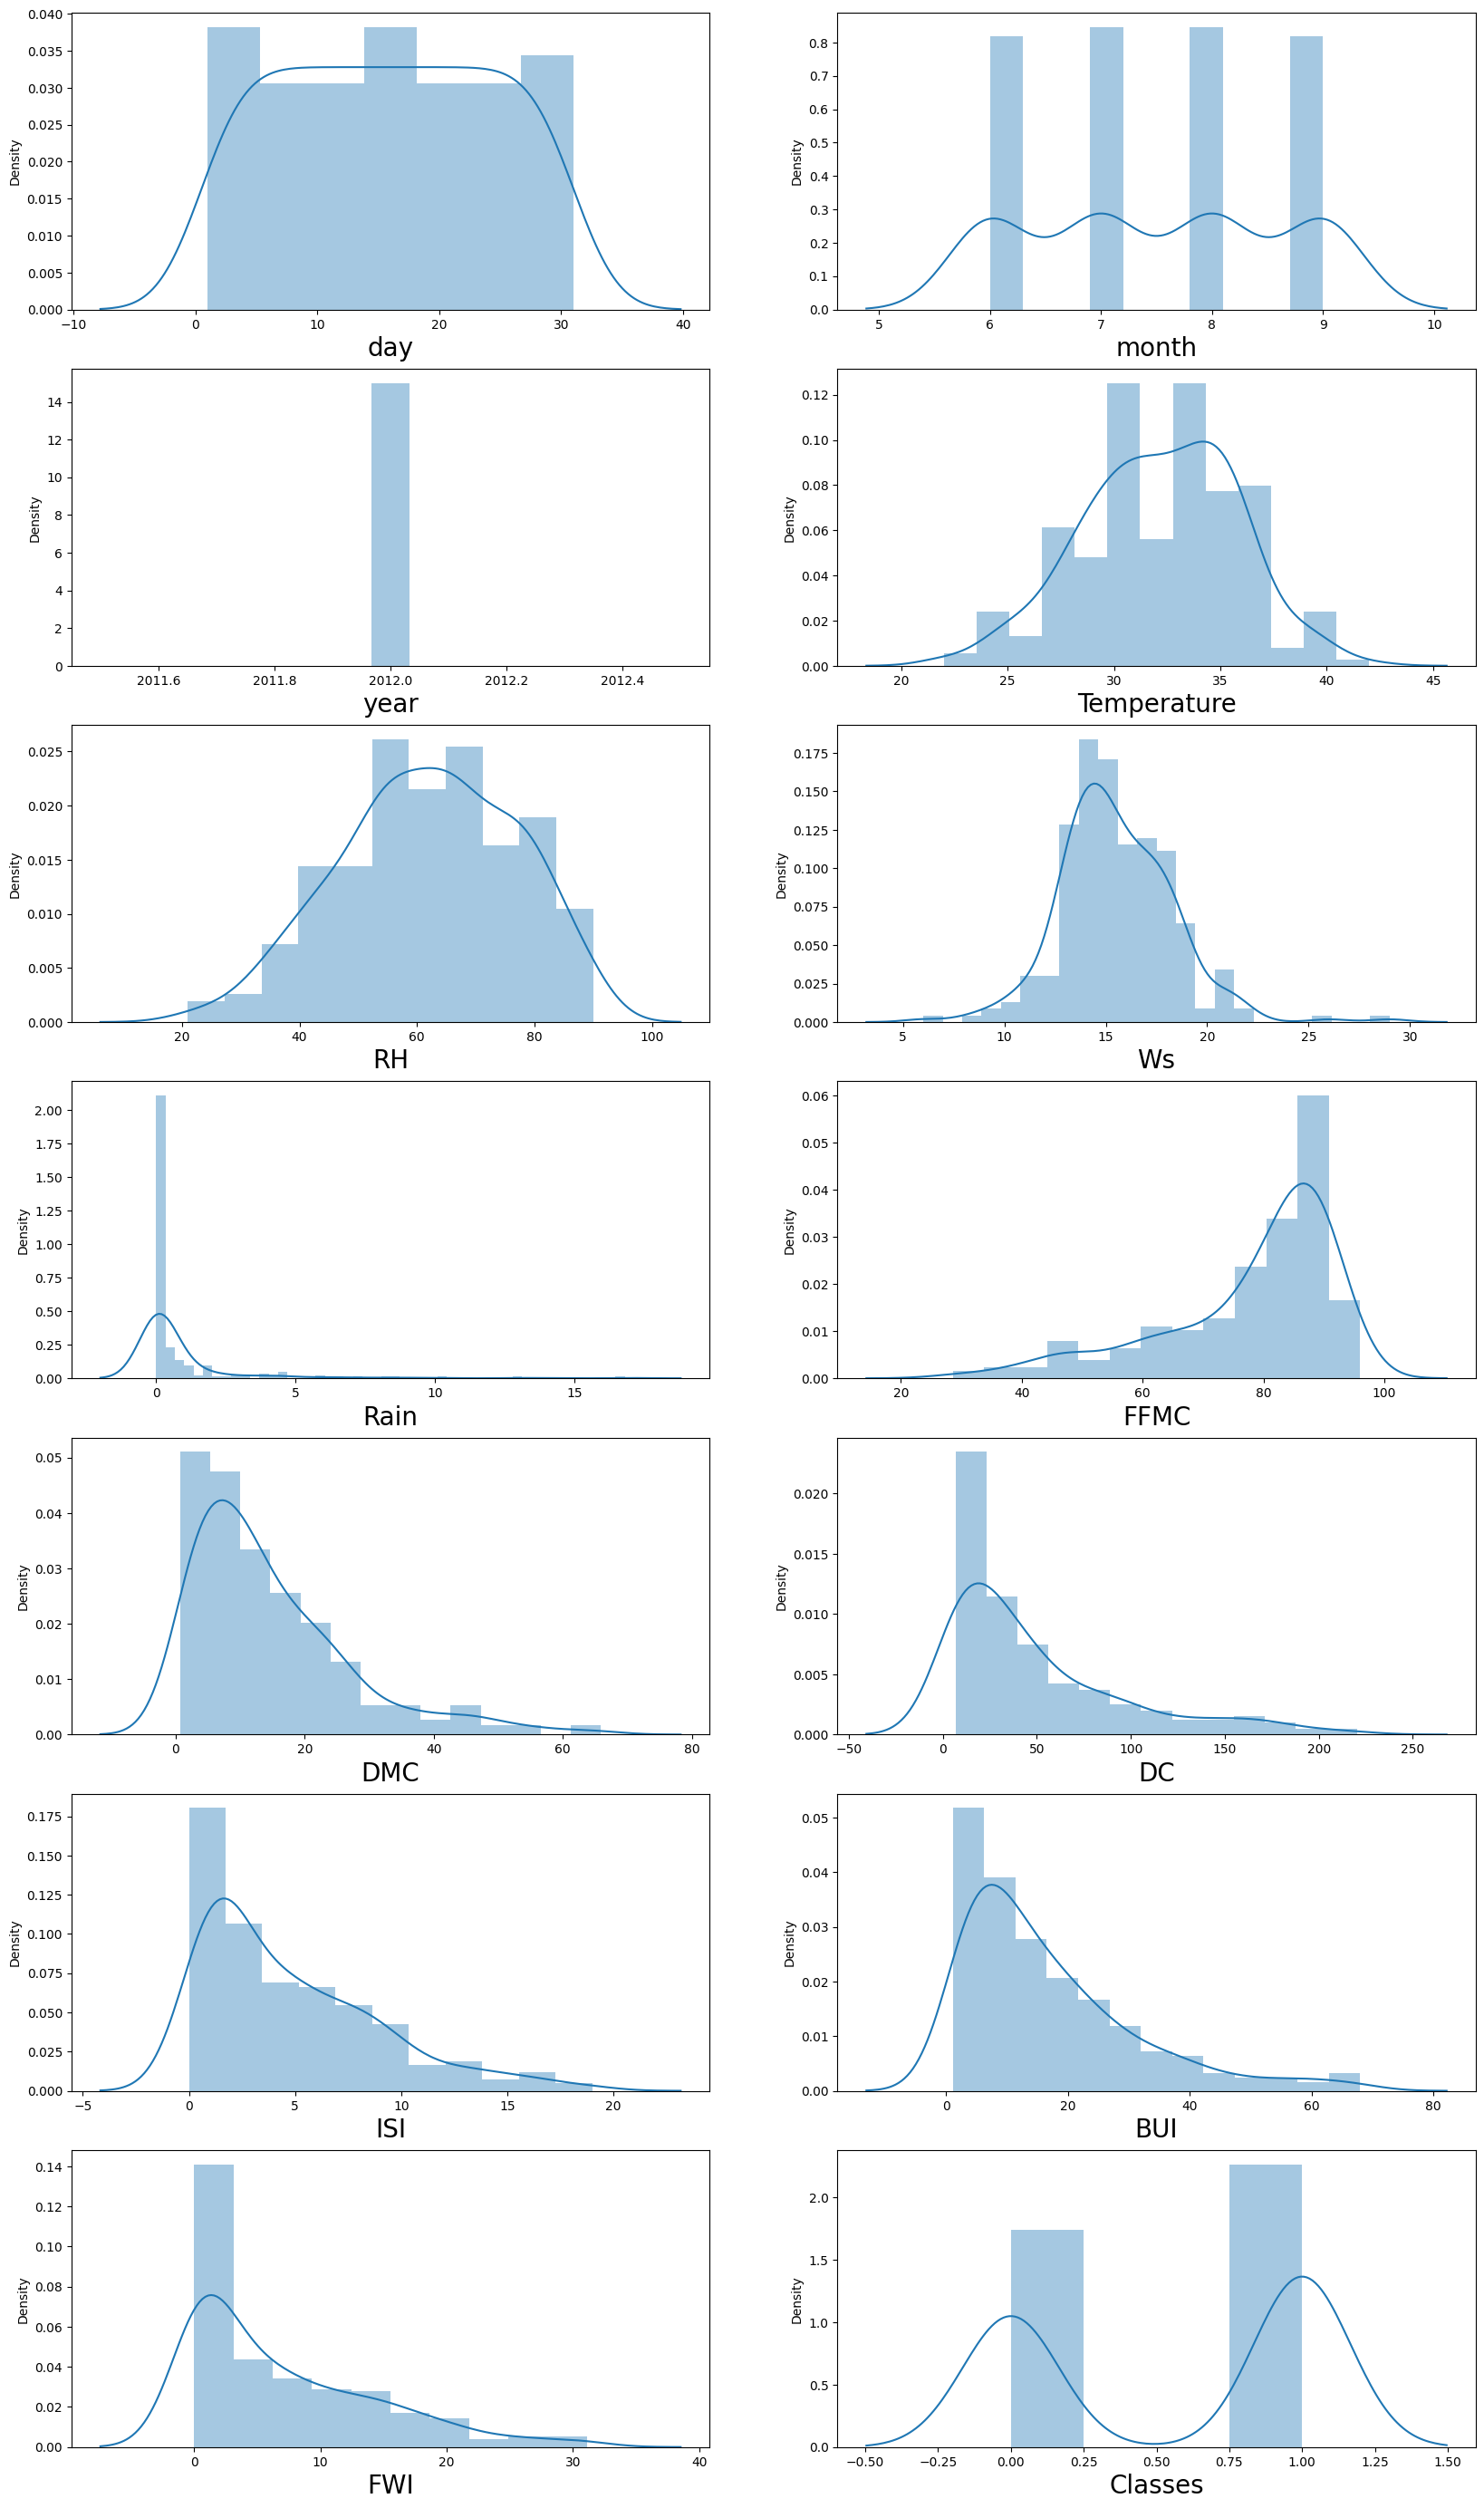

In [29]:

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     
        ax = plt.subplot(8,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

<AxesSubplot: >

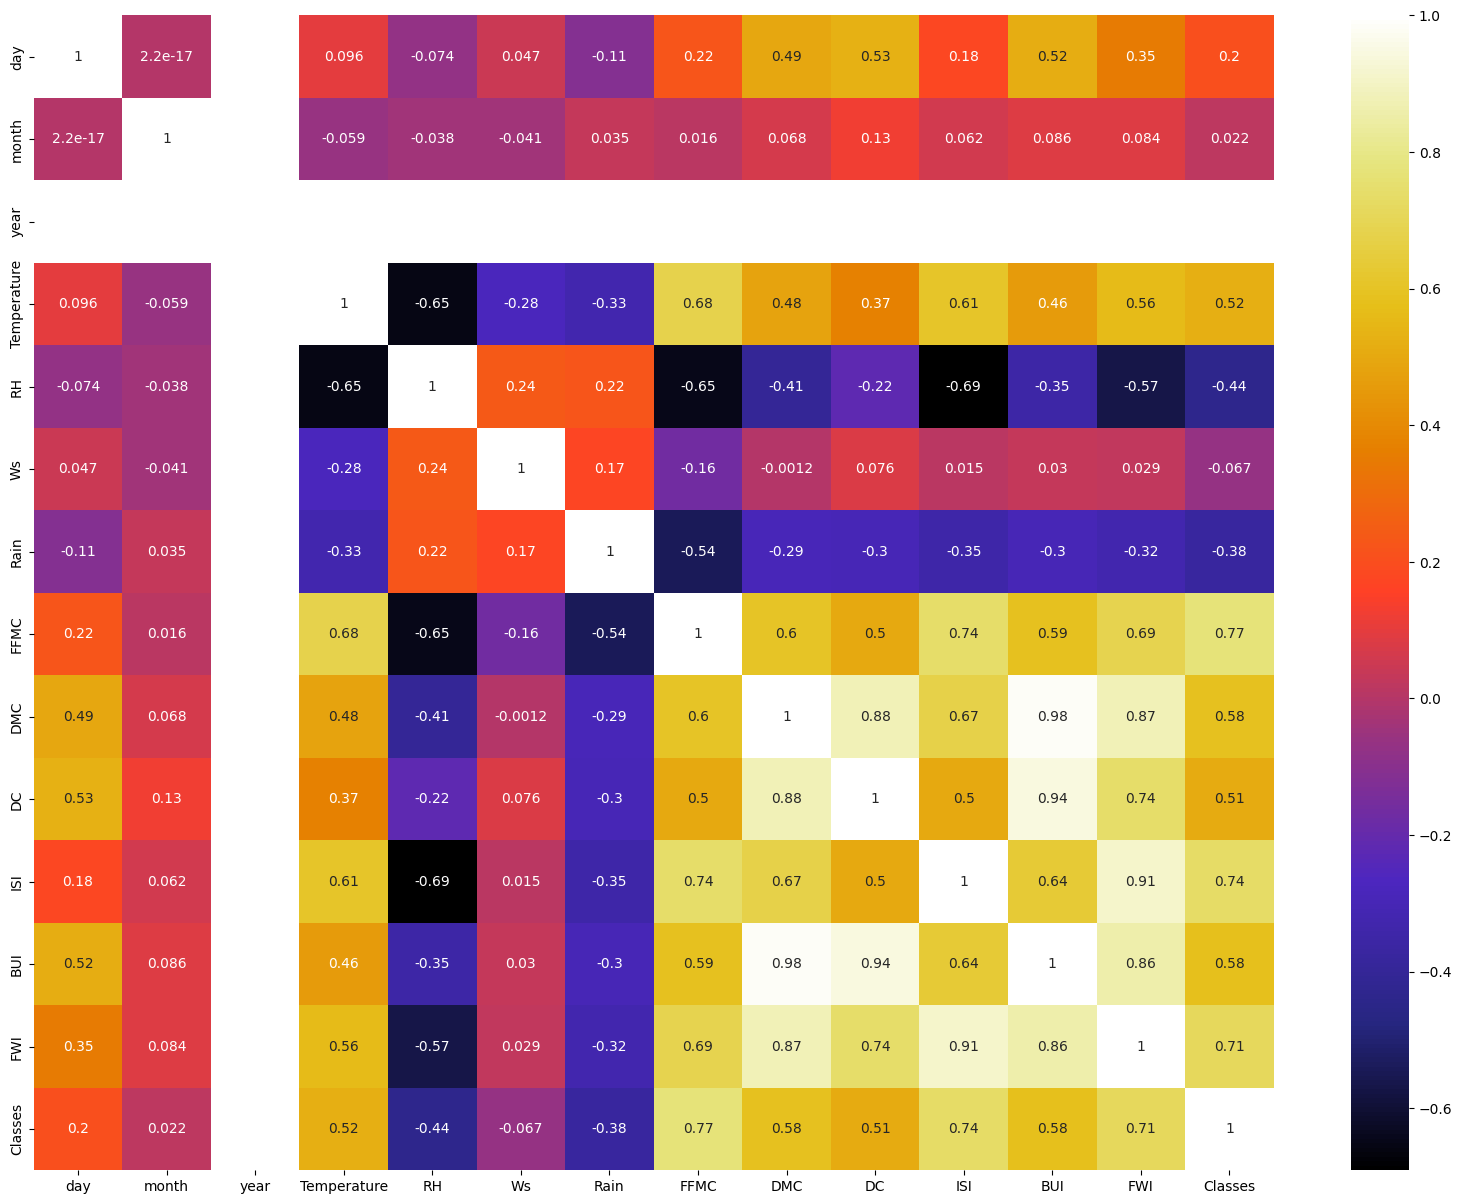

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='CMRmap',annot=True)


In [31]:
data.Classes.value_counts()


1    138
0    106
Name: Classes, dtype: int64

Text(0.5, 1.0, 'Temperature distribution')

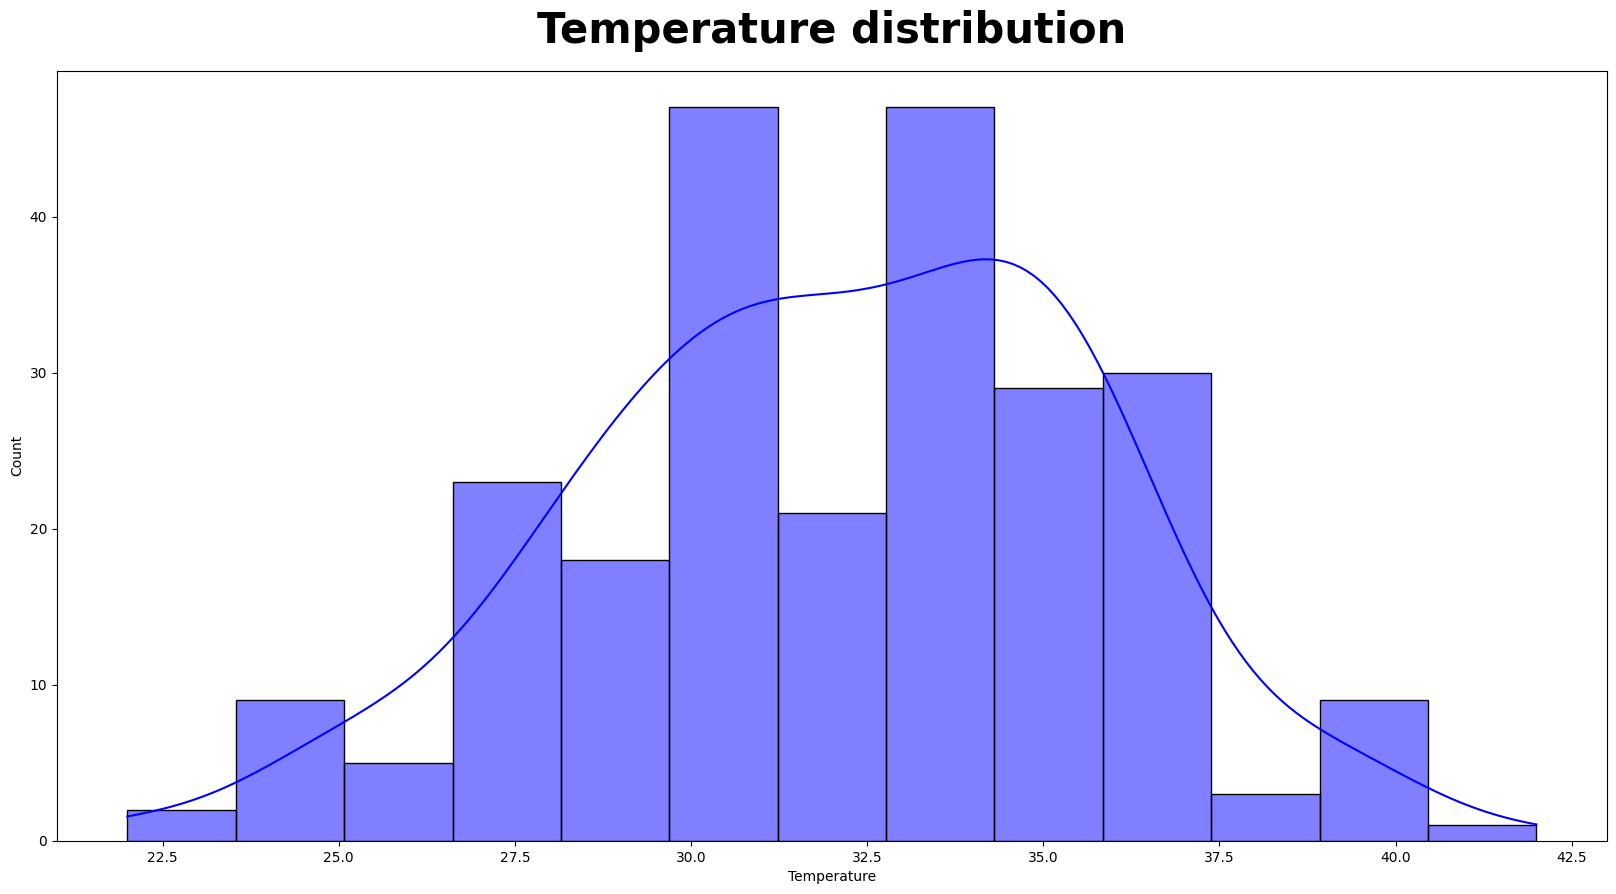

In [32]:

plt.subplots(figsize=(20,10))
sns.histplot('distribution of temperature',x=data.Temperature,color='b',kde=True)
plt.title('Temperature distribution',weight='bold',fontsize='30',pad=20 )


<AxesSubplot: xlabel='Temperature', ylabel='Classes'>

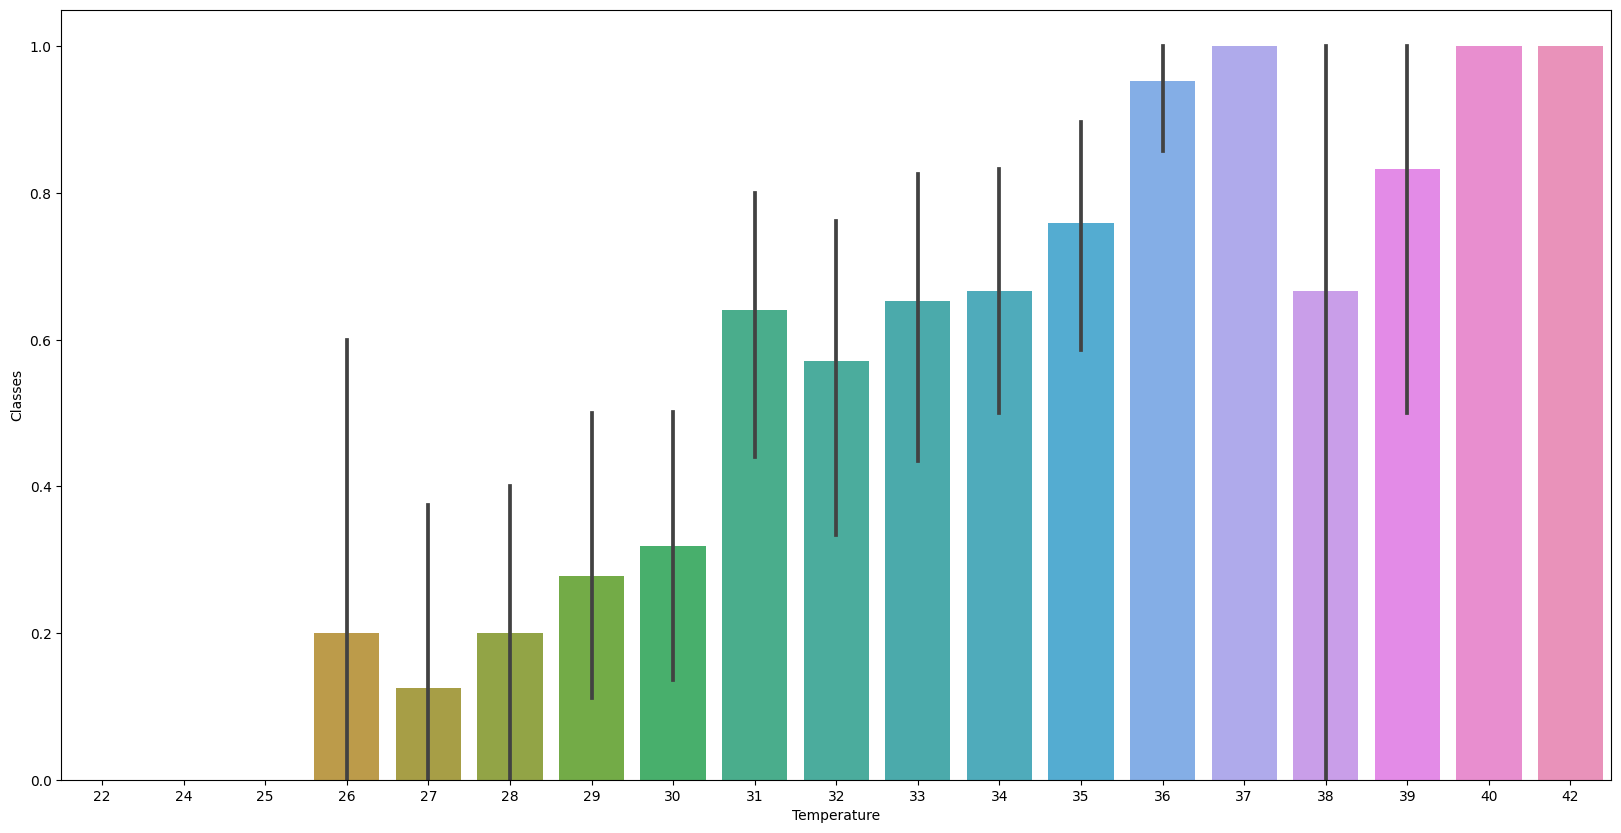

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Temperature',y='Classes',data=data)


In [34]:
num_col=[feature for feature in data.columns if data[feature].dtype!='0']
num_col


['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [35]:

def outliers(data,Temp):
    iqr=1.5*(np.percentile(data[Temp],75)-np.percentile(data[Temp],25))
    data.drop(data[data[Temp]>(iqr+np.percentile(data[Temp],75))].index,inplace=True)
    data.drop(data[data[Temp]<(np.percentile(data[Temp],25)-iqr)].index,inplace=True)
outliers(data,'Temperature')   

<AxesSubplot: >

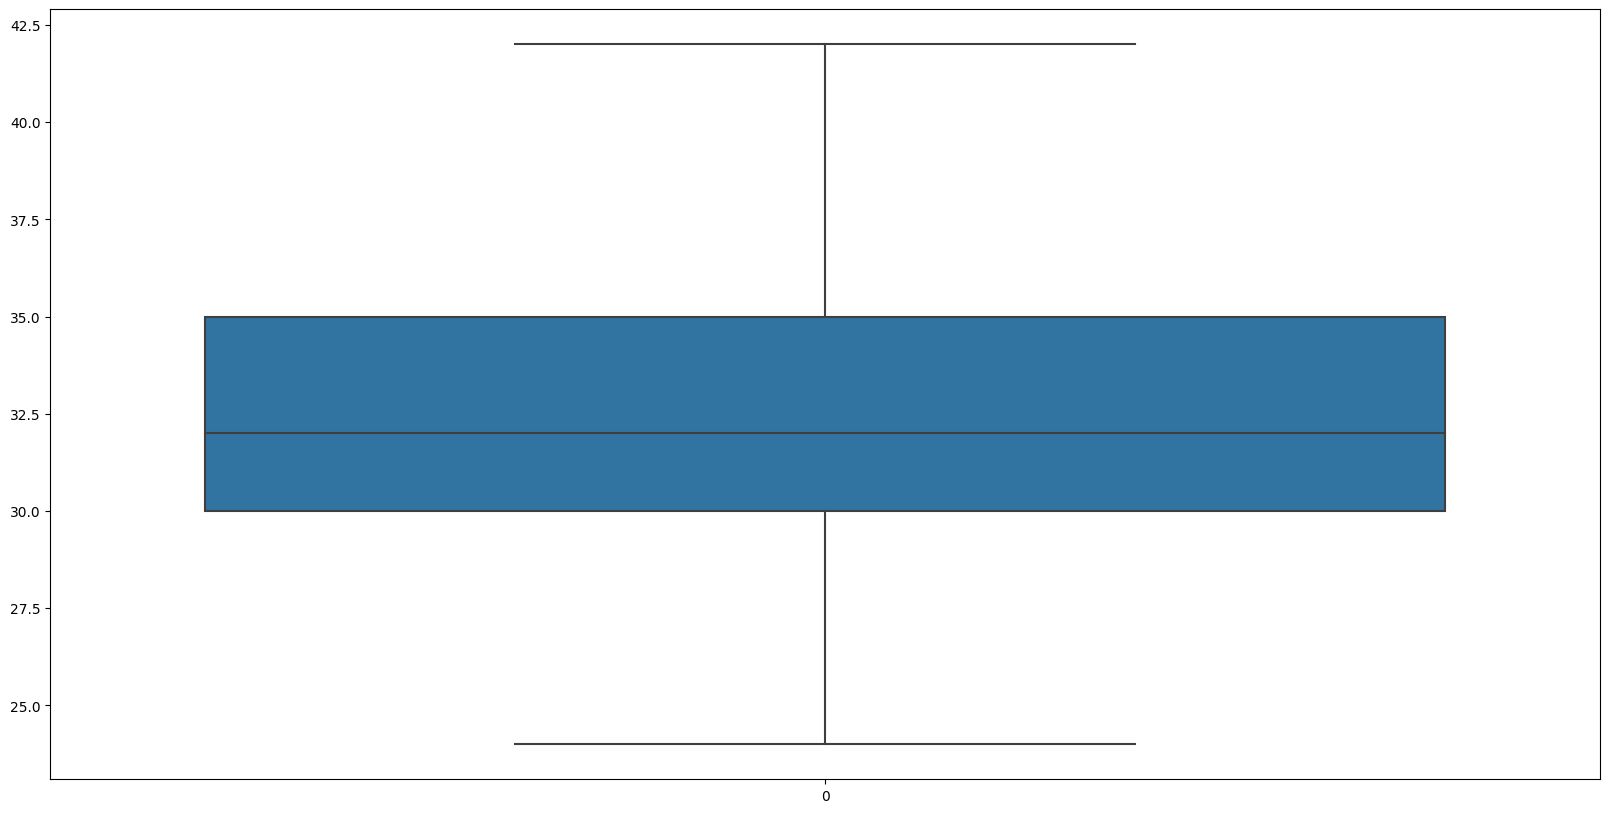

In [36]:
sns.boxplot(data.Temperature )


<AxesSubplot: >

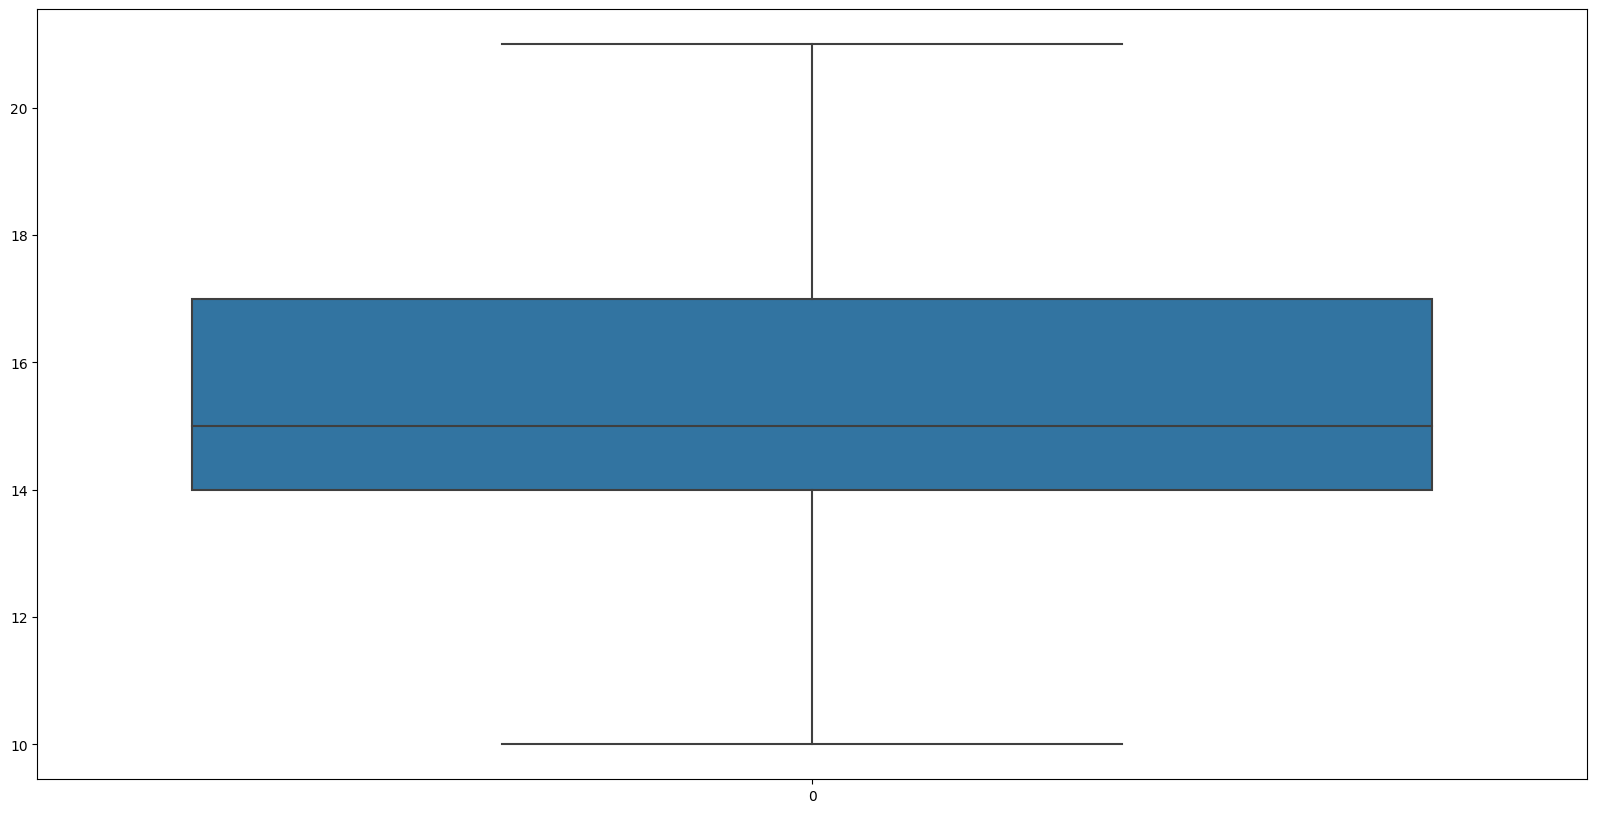

In [37]:
outliers(data,'Ws')       
sns.boxplot(data.Ws )

<AxesSubplot: >

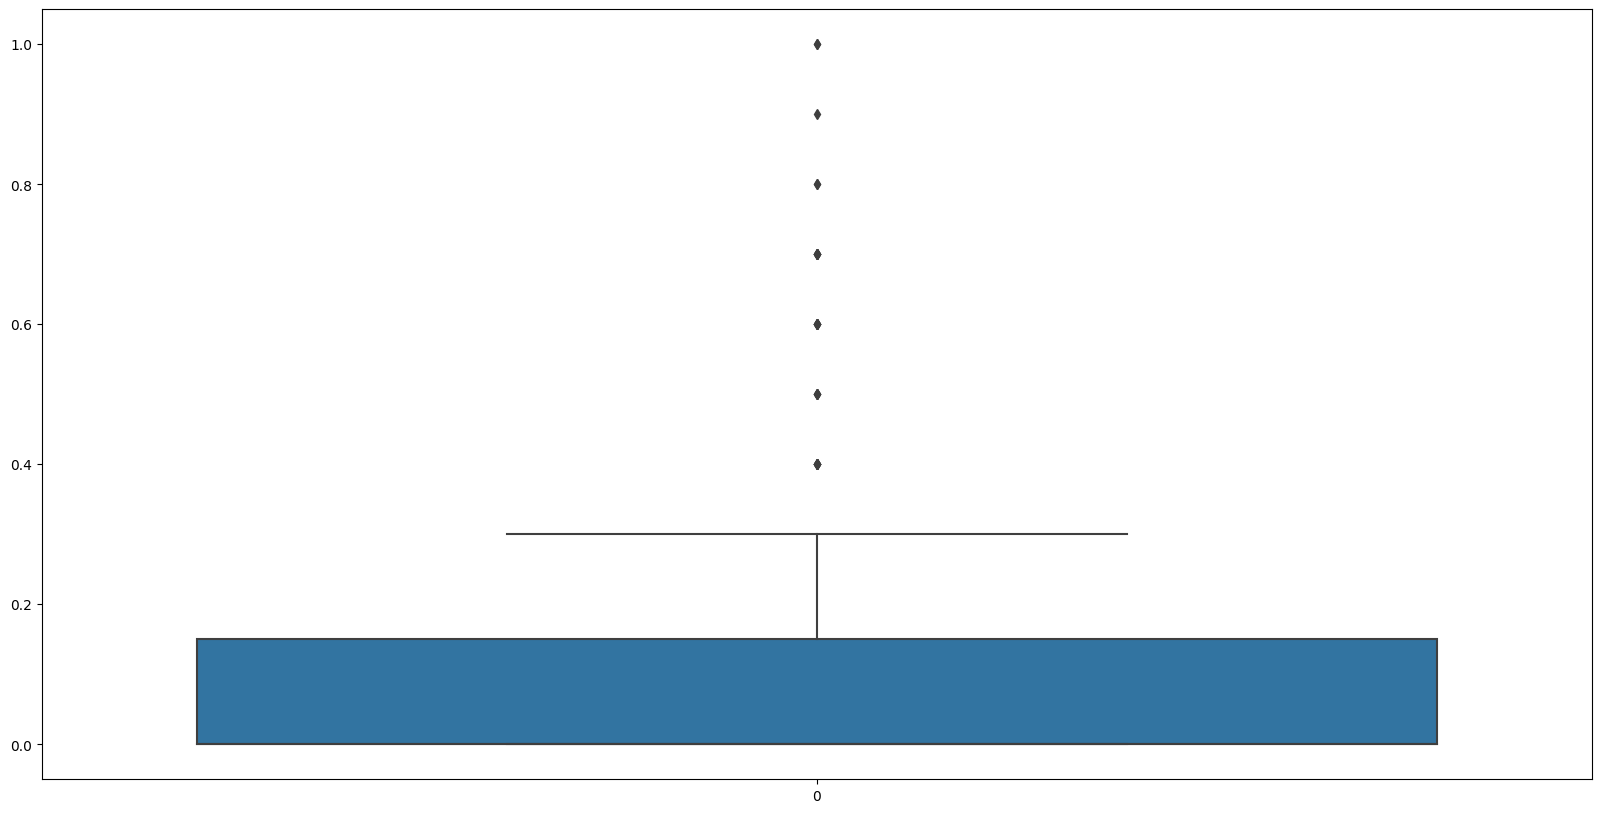

In [38]:
outliers(data,'Rain')   
sns.boxplot(data.Rain )

<AxesSubplot: >

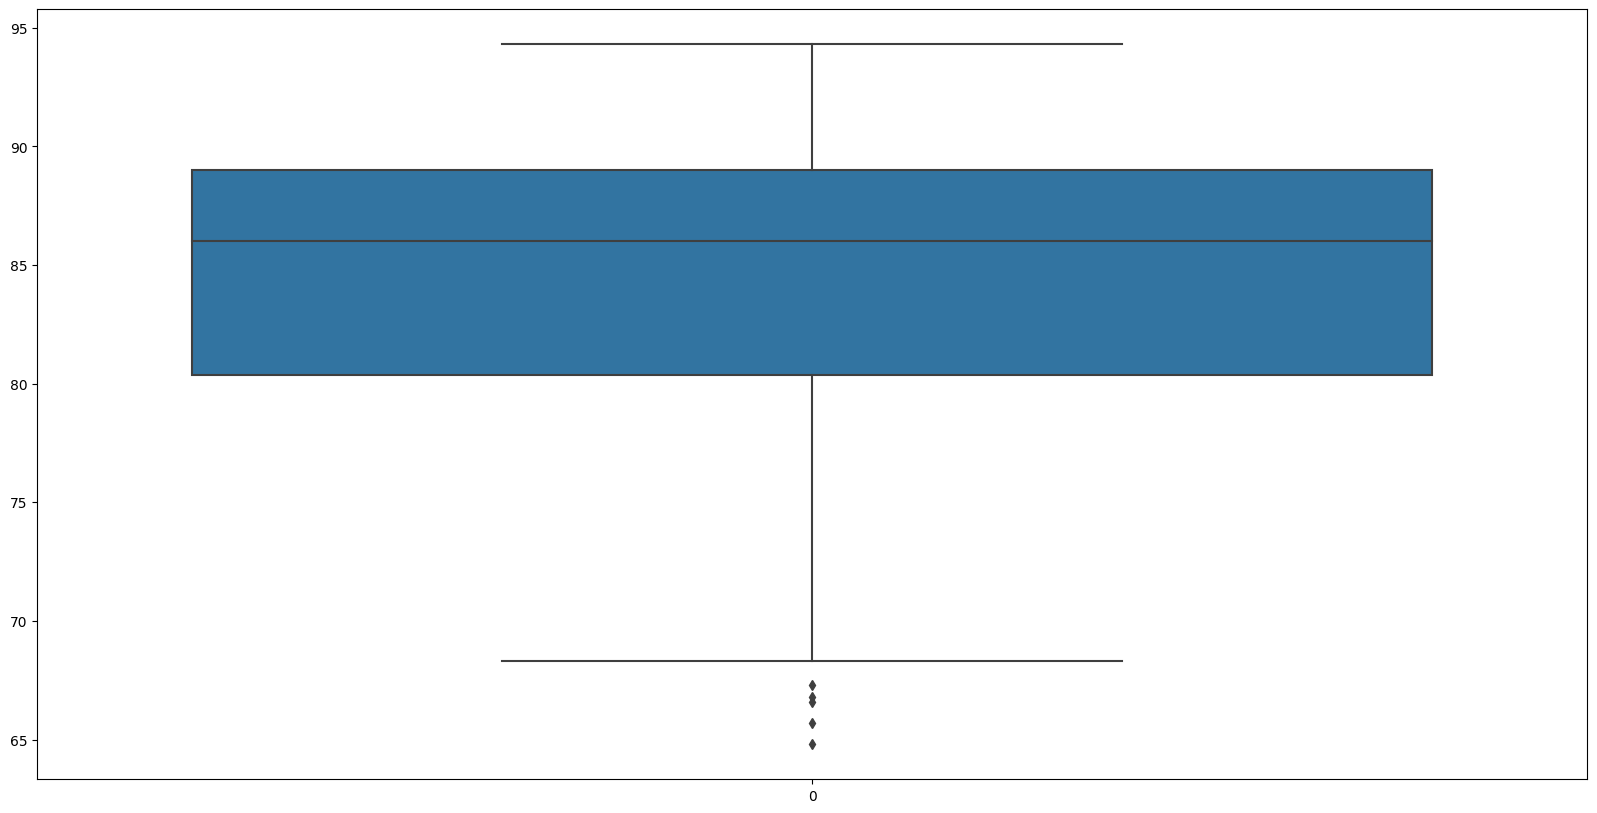

In [39]:

outliers(data,'FFMC')   
sns.boxplot(data.FFMC )

<AxesSubplot: >

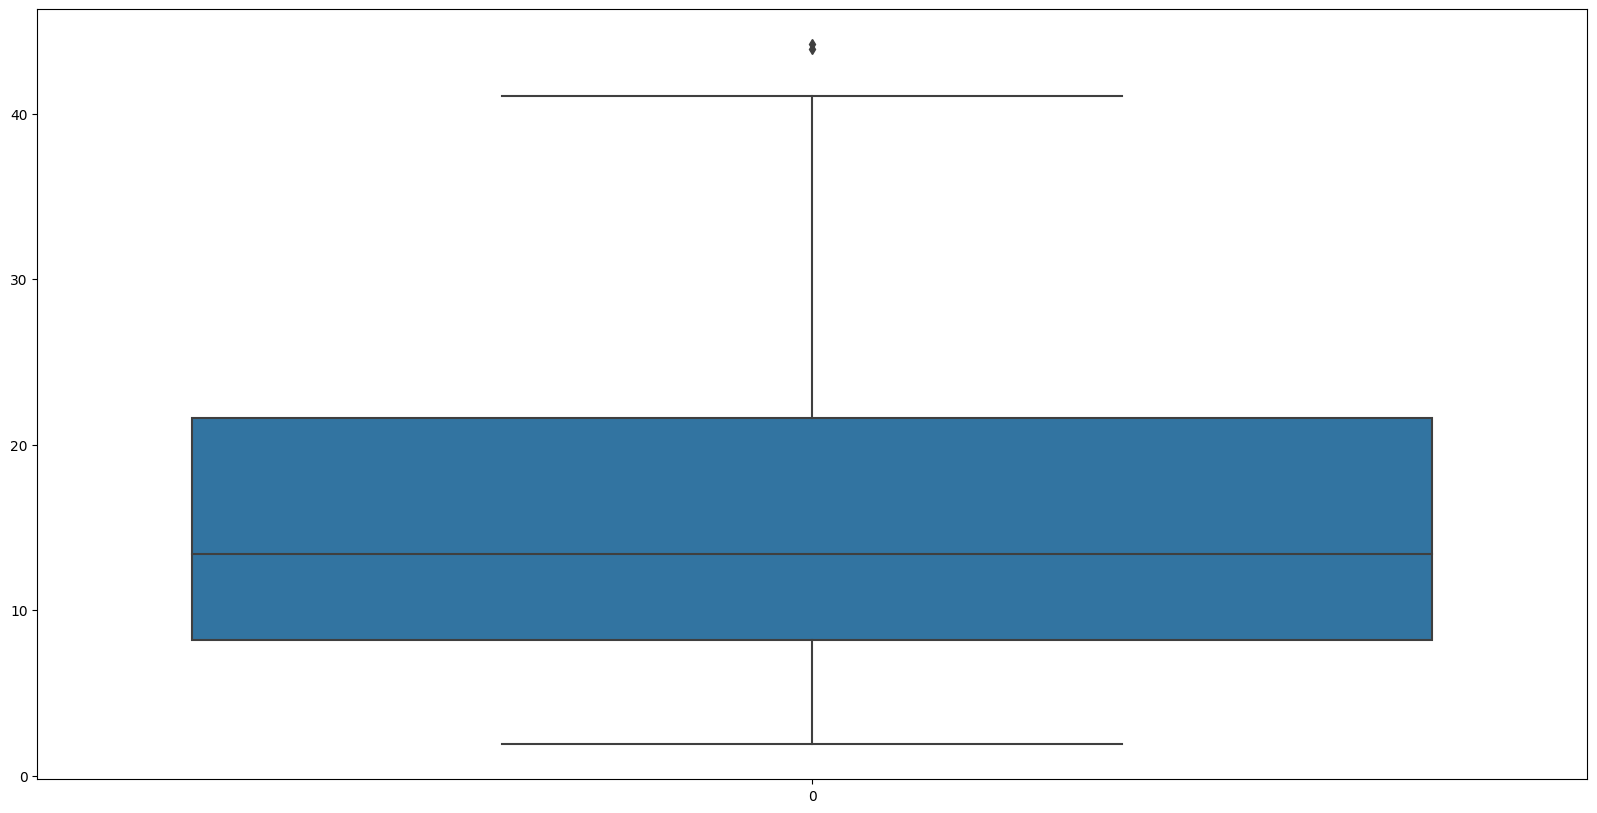

In [40]:
outliers(data,'DMC')   
sns.boxplot(data.DMC )

<AxesSubplot: >

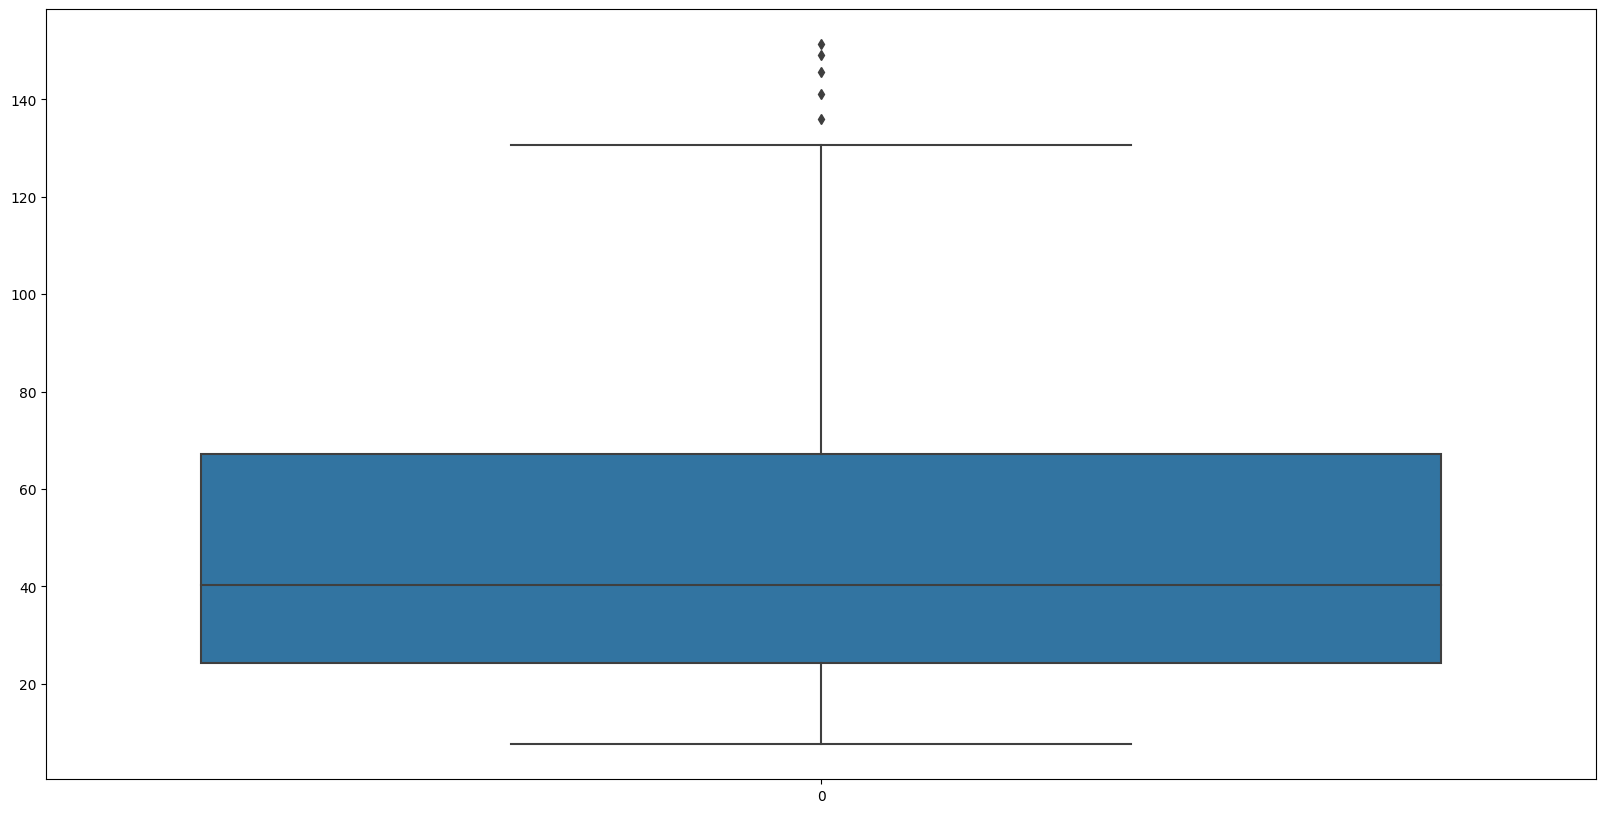

In [41]:
outliers(data,'DC')   
sns.boxplot(data.DC )


<AxesSubplot: >

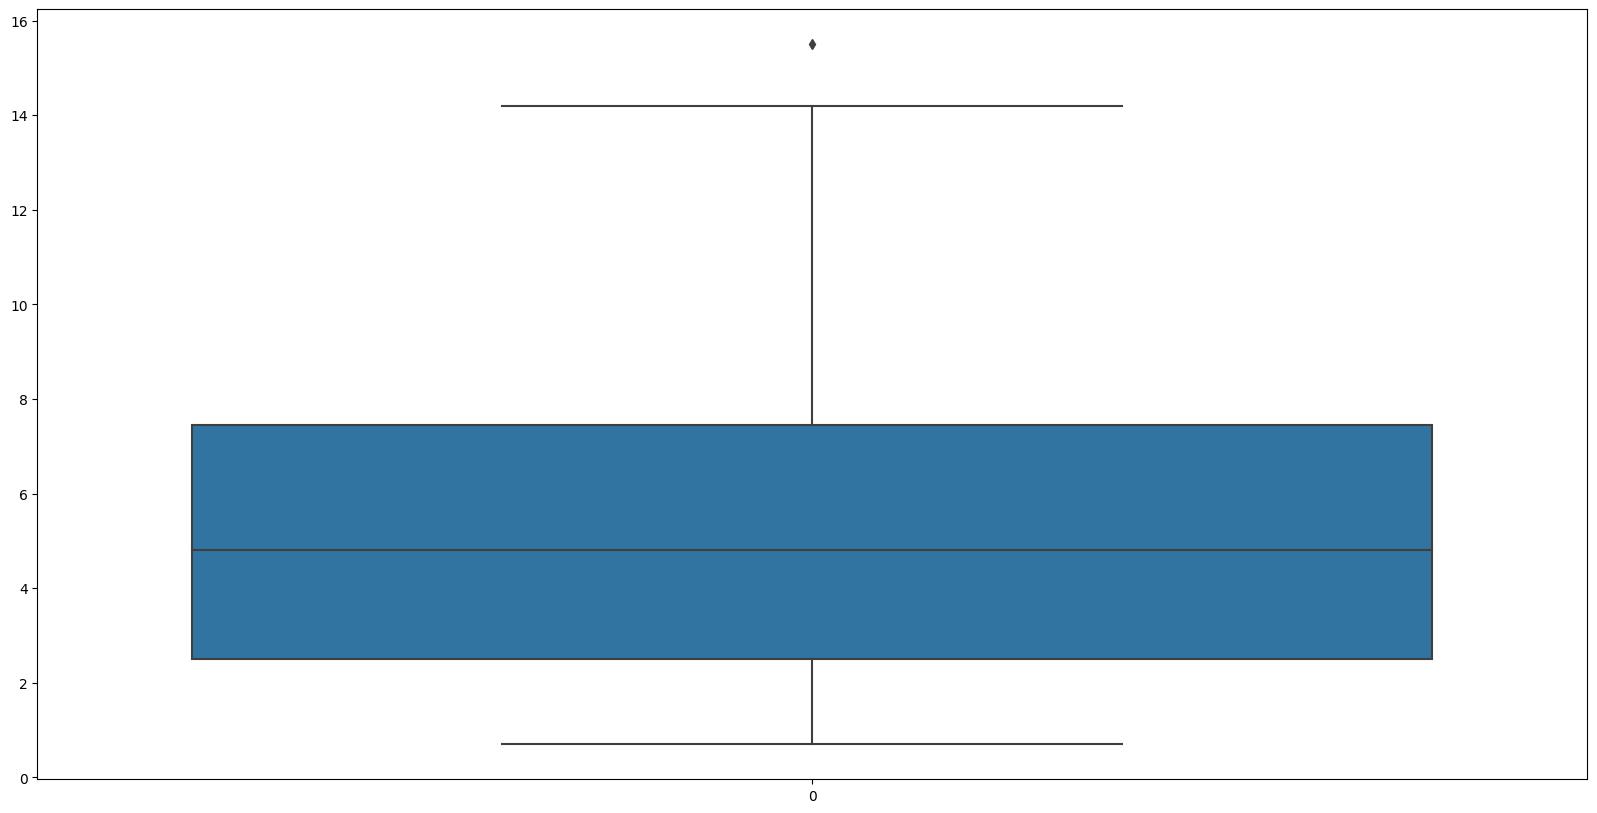

In [42]:
outliers(data,'ISI')   
sns.boxplot(data.ISI )


<AxesSubplot: >

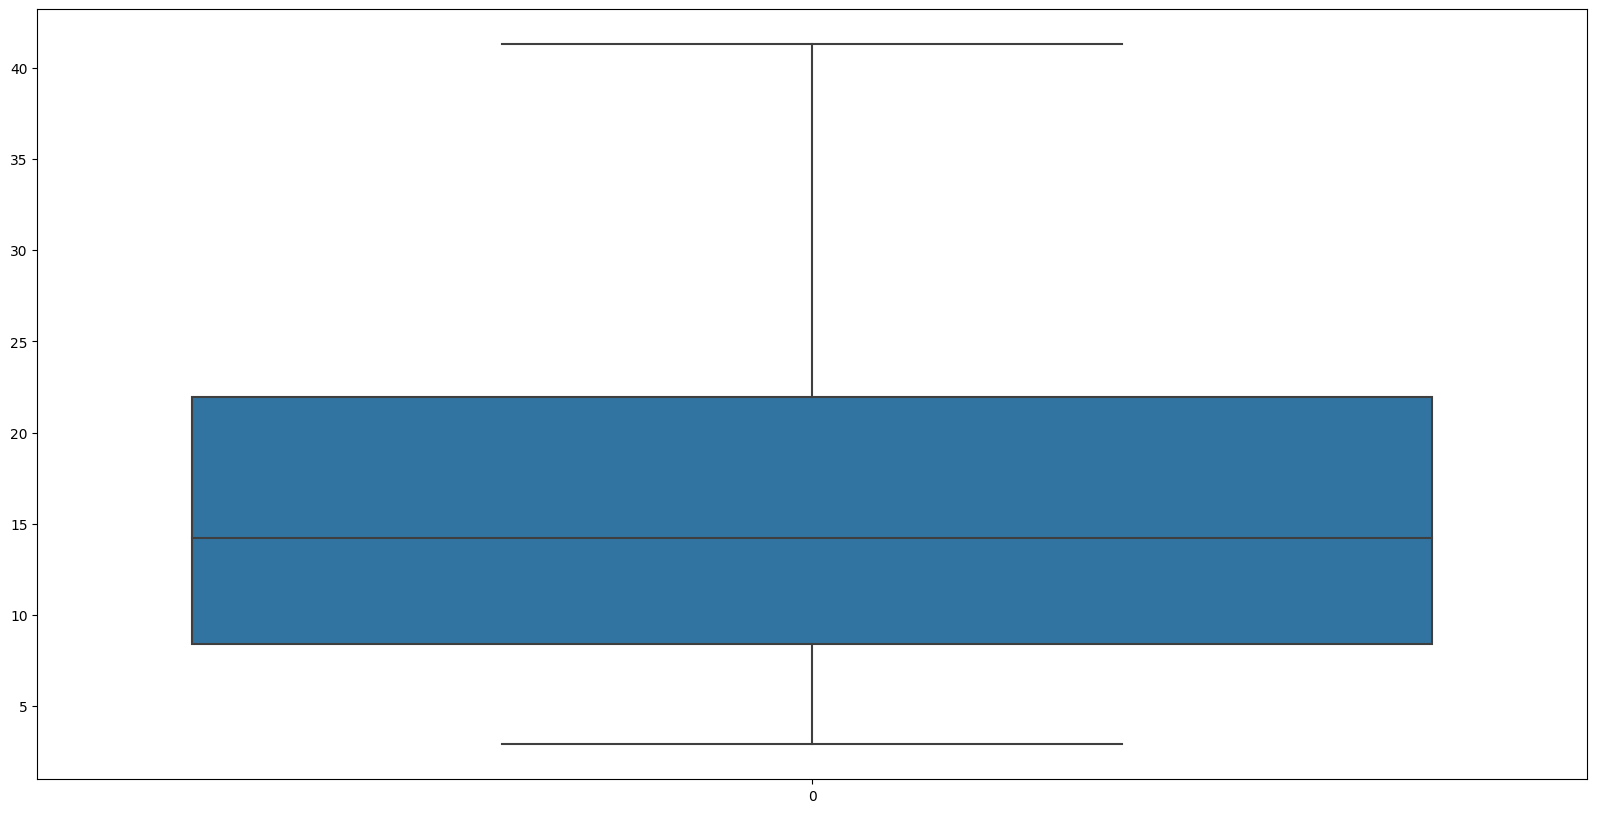

In [43]:
outliers(data,'BUI')   
sns.boxplot(data.BUI )


<AxesSubplot: >

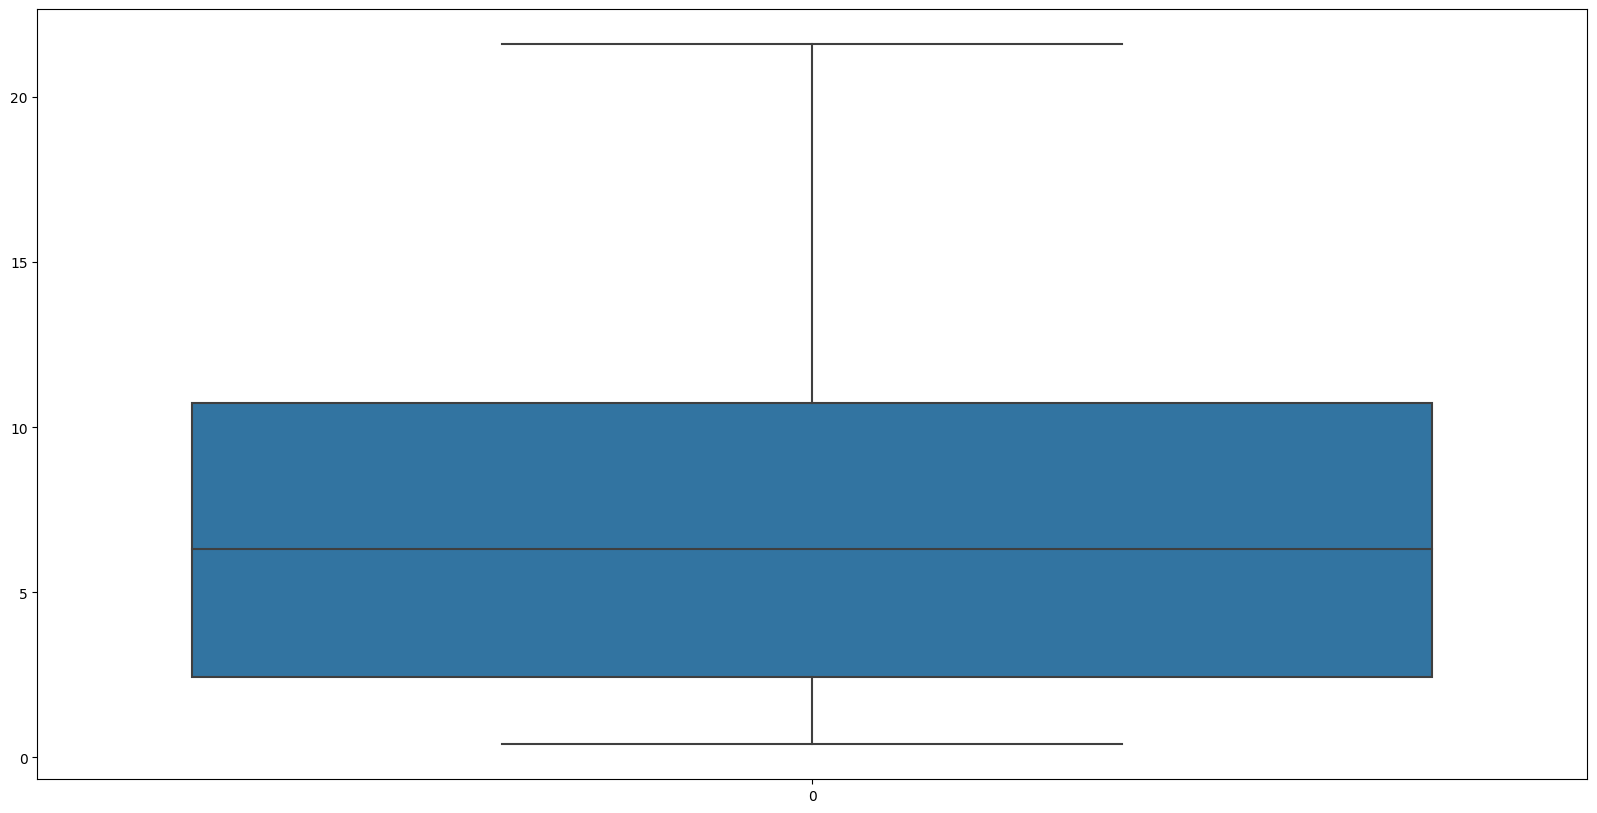

In [44]:
outliers(data,'FWI')   
sns.boxplot(data.FWI )

In [45]:
X = data.drop(columns = ['Classes'])
y = data['Classes']


In [46]:
print(X)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4    7.6  1.3   
4      5      6  2012           27  77  16   0.0  64.8   3.0   14.2  1.2   
5      6      6  2012           31  67  14   0.0  82.6   5.8   22.2  3.1   
6      7      6  2012           33  54  13   0.0  88.2   9.9   30.5  6.4   
7      8      6  2012           30  73  15   0.0  86.6  12.1   38.3  5.6   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...    ...  ...   
236   23      9  2012           35  56  14   0.0  89.0  29.4  115.6  7.5   
238   25      9  2012           28  70  15   0.0  79.9  13.8   36.1  2.4   
239   26      9  2012           30  65  14   0.0  85.4  16.0   44.5  4.5   
242   29      9  2012           24  54  18   0.1  79.7   4.3   15.2  1.7   
243   30      9  2012           24  64  15   0.2  67.3   3.8   16.5  1.2   

      BUI   FWI  
0     3.4   0.5  
4     3.9   0.5  
5     7.0   2.5  
6    10.9   7.2

In [47]:
print(y)

0      0
4      0
5      1
6      1
7      1
      ..
236    1
238    0
239    1
242    0
243    0
Name: Classes, Length: 156, dtype: int32


#Random Forest

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [50]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,10]
}

In [51]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [52]:
print('best param:',grid_search.best_params_)
print('best score:',grid_search.best_score_)

best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.9743951612903226


In [53]:
RF=RandomForestClassifier(max_depth=5,min_samples_split=5,n_estimators=200)

In [54]:
RF.fit(X,y)
y_pred=RF.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
print("X_test: \n", X_test)
print("y_pred: \n", y_pred)

X_test: 
      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
148   27      6  2012           36  55  15   0.0  89.1  20.9   43.3   8.0   
103   12      9  2012           29  88  13   0.0  71.0   2.6   16.6   1.2   
125    4      6  2012           30  64  14   0.0  79.4   5.2   15.4   2.2   
113   22      9  2012           31  50  19   0.6  77.8  10.6   41.4   2.4   
177   26      7  2012           35  58  10   0.2  78.3  10.8   19.7   1.6   
45    16      7  2012           28  76  21   0.0  72.6   7.0   25.5   0.7   
146   25      6  2012           34  70  16   0.0  86.0  12.8   25.6   5.4   
203   21      8  2012           36  71  15   0.0  86.0  36.9  117.1   5.1   
145   24      6  2012           35  68  16   0.0  85.3  10.0   17.0   4.9   
222    9      9  2012           30  80  15   0.0  83.1   7.9   34.5   3.5   
33     4      7  2012           33  78  17   0.0  80.1   4.6   18.5   2.7   
136   15      6  2012           28  90  15   0.0  66.8   7.2   14.

In [56]:
#Accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

base_clf = RandomForestClassifier(random_state=42)


bagging = BaggingClassifier(base_estimator=base_clf, n_estimators=200, random_state=42)

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)


In [58]:

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9230769230769231


In [59]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.9583333333333334


In [60]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.9387755102040817


In [61]:
import pickle
file='finalmodelrf.sav'
pickle.dump(RF,open(file,'wb'))

In [62]:
model=pickle.load(open('finalmodel.sav','rb'))

In [63]:
X1=[[3,2,2023,24,2,6,35,343,32,43,53,23,43]]
model.predict(X1)

array([1])

In [64]:
f='Randomforest.pkl'
pickle.dump(RF,open(f,'wb'))